### Case Study  1
    Date : March 23, 2019
    Instructor : Bob Wu
    
# Machine Learning: Traffic Police Stop
>This case study explores a real-data of traffic stops stored and distributed under Stanford open policing project. The stops data was recorded for Rhode Island state in USA. Each row in the dataset contains record of individual stops. Various variables such as reason for stop , outcome of stop , and demographic variable of driver appear as fields. In this exercise we will use proper data processing methods to setup the dataset for machine learning. 



### Importing the Required Libraries
Often times data analysis requires manipulations that are out of bounds for python built-in capabilities. Hence we need to import these external libraries/packages. It is a standard practice to import the required libraries early on in the process (usually first two cells)

In [2]:
## Data Analysis Libraries
import pandas as pd
import numpy as np

## Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpl

## Preprocessing Libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Training Functions
from sklearn.model_selection import KFold, ParameterGrid

## Machine learning libraries
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### Importing Dataset
Source : Online Policing Project


In [3]:
df=pd.read_excel("Rhode Island Traffic Stops.xlsx")
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,0.0,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,0.0,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,0.0,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,1.0,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,0.0,0-15 Min,False,Zone X3


## Exploring Data Types

In order to prepare your data into a machine-friendly format, it's necessary to convert all categorical data into numbers. One-hot encoding is used for nominal data and label encoding for ordinal. Let's explore some of the categorical variables below.

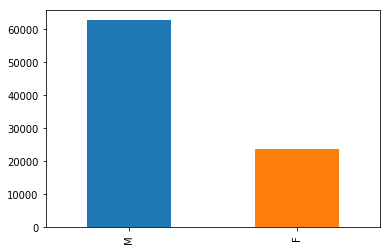

In [4]:
df['driver_gender'].value_counts().plot.bar() #counts frequency

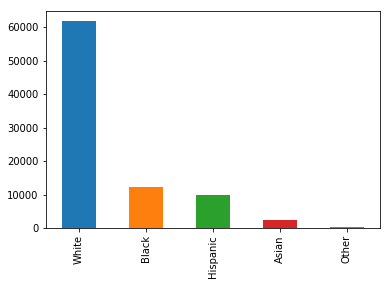

In [6]:
df['driver_race'].value_counts().plot.bar()

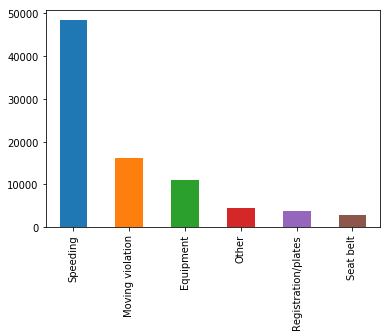

In [7]:
df['violation'].value_counts().plot.bar()

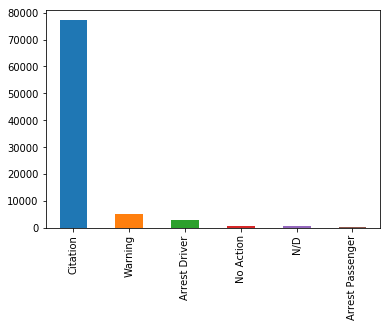

In [8]:
df['stop_outcome'].value_counts().plot.bar()

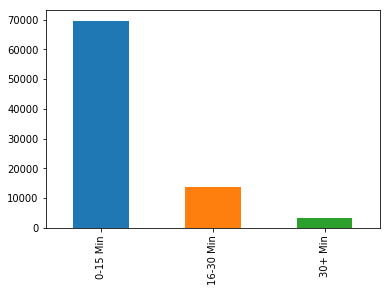

In [9]:
df['stop_duration'].value_counts().plot.bar()

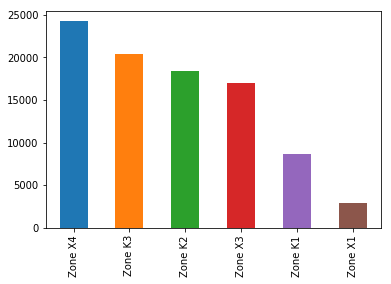

In [10]:
df['district'].value_counts().plot.bar()

## Feature Types

First step is to decide which features are relevant for your problem and categorize them as nominal, ordinal, or numeric

In [11]:
nominal_feature = ["driver_gender","driver_race","violation","district"]
ordinal_feature = ["stop_duration","stop_outcome"]
numeric_feature = ["search_conducted","drugs_related_stop"]

all_features = nominal_feature + ordinal_feature + numeric_feature

## Encoding Categorical Variables

Let's select all the features we're interested in using from our dataset (**df[all_features]**) and convert all nominal features to dummy variables (**column=nominal_feature**).

In [22]:
data = pd.get_dummies(df[all_features],columns=nominal_feature)
data.head()

,stop_duration,stop_outcome,search_conducted,drugs_related_stop,driver_gender_F,driver_gender_M,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,...,violation_Other,violation_Registration/plates,violation_Seat belt,violation_Speeding,district_Zone K1,district_Zone K2,district_Zone K3,district_Zone X1,district_Zone X3,district_Zone X4
0,0-15 Min,Citation,False,False,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0-15 Min,Citation,False,False,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0-15 Min,Citation,False,False,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,16-30 Min,Arrest Driver,False,False,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0-15 Min,Citation,False,False,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Next, we'll convert all the ordinal features to numeric values based on a dictionary of category-number pairs.

In [23]:
# assigns order to ordinal features
cat_values = {
    "stop_duration": {'0-15 Min':0,'16-30 Min':1,'30+ Min':2},
    "stop_outcome": {'N/D':-1,'No Action':0,'Warning':1,'Citation':2,'Arrest Passenger':3,'Arrest Driver':4}
}

# process all ordinal features
for col in ordinal_feature:
    data[col] = pd.Categorical(data[col],ordered=True,categories=cat_values[col]).codes

data.head()

,stop_duration,stop_outcome,search_conducted,drugs_related_stop,driver_gender_F,driver_gender_M,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,...,violation_Other,violation_Registration/plates,violation_Seat belt,violation_Speeding,district_Zone K1,district_Zone K2,district_Zone K3,district_Zone X1,district_Zone X3,district_Zone X4
0,0,3,False,False,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,3,False,False,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,3,False,False,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,5,False,False,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,3,False,False,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Finally, we'll convert all the numeric variables.

In [31]:
data[numeric_feature] = df[numeric_feature].astype(int)
data.head()

,stop_duration,stop_outcome,search_conducted,drugs_related_stop,driver_gender_F,driver_gender_M,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,...,violation_Other,violation_Registration/plates,violation_Seat belt,violation_Speeding,district_Zone K1,district_Zone K2,district_Zone K3,district_Zone X1,district_Zone X3,district_Zone X4
0,0,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,3,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,3,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,5,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,3,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Setting up Dataset

Now we can set up our dataset variable and do some final processing.

In [32]:
data.fillna(-1,inplace=True)
target_column = "stop_outcome"

In [33]:
y = data[target_column].values #target column
X = data.drop([target_column],axis=1).values #exclude the target column

## Classification

Let's try out the basic random forest classifier.

In [34]:
model = RandomForestClassifier()
model.fit(X,y)
print("score:",model.score(X,y))

C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


score: 0.9015380255283897


In [28]:
yp = model.predict(X)

In [54]:
data[(yp!=y)].head()

,stop_duration,stop_outcome,search_conducted,drugs_related_stop,driver_gender_F,driver_gender_M,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,...,violation_Other,violation_Registration/plates,violation_Seat belt,violation_Speeding,district_Zone K1,district_Zone K2,district_Zone K3,district_Zone X1,district_Zone X3,district_Zone X4
3,1,5,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
16,2,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31,0,2,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
71,2,5,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
72,0,2,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## Crossvalidation Dataset

In [38]:
kf = KFold(n_splits=5,random_state=42,shuffle=True) #5 fold cross validation
kf_scores = []
kf

KFold(n_splits=5, random_state=42, shuffle=True)

## Train model

In [49]:
def model_evaluate(model_type,X,y,kfold,model_params={}):
    kf_scores = []
    for train_ind, test_ind in kf.split(X):
        model = model_type(**model_params)
        model.fit(X[train_ind],y[train_ind])
        score = model.score(X[test_ind],y[test_ind])
        kf_scores.append(score)
        print(score)
    return kf_scores

In [50]:
kf_scores = model_evaluate(RandomForestClassifier,X,y,kf)

C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8951986484277072


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8969914977109221


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.894702419882276


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8959014606496621


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8967734902986702


In [51]:
print("mean scores: ",np.mean(kf_scores))

mean scores:  0.8959135033938475


## Grid Search Optimization

Now that we have our model, we need a way to automatically optimize our parameters.

In [46]:
params = {'n_estimators': [10,100],
          'oob_score': [True,False],
          'min_samples_split': [2,3]
          }

params_grid = ParameterGrid(params)
best_params = {}

list(params_grid) #all the combinations to test

[{'min_samples_split': 2, 'n_estimators': 10, 'oob_score': True},
 {'min_samples_split': 2, 'n_estimators': 10, 'oob_score': False},
 {'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True},
 {'min_samples_split': 2, 'n_estimators': 100, 'oob_score': False},
 {'min_samples_split': 3, 'n_estimators': 10, 'oob_score': True},
 {'min_samples_split': 3, 'n_estimators': 10, 'oob_score': False},
 {'min_samples_split': 3, 'n_estimators': 100, 'oob_score': True},
 {'min_samples_split': 3, 'n_estimators': 100, 'oob_score': False}]

In [52]:
for params in params_grid:
    scores = model_evaluate(RandomForestClassifier,X,y,kf,model_params=params)
    best_params[np.mean(scores)] = params

C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8957436372554363


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8966099847394812


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8953564421190321


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8960649662088511


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8973730106823632
0.8956891383726634
0.8968824940047961
0.894702419882276
0.8961739699149771
0.8970459995639852
0.8960161316693008
0.8969369958578591
0.8954109439720951
0.8959559625027251
0.8979180292129932
0.895907133903755
0.8967189884456072
0.8953564421190321
0.895792456943536
0.8979180292129932


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8954166439587988


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8972640069762372


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8954109439720951


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8964464791802921


C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hongb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8977000218007413
0.8961251294348466
0.8966099847394812
0.8956289513843471
0.8959014606496621
0.8968824940047961
0.8966156193798027
0.8971005014170482
0.8954109439720951
0.8967734902986702
0.8975910180946152
0.8962886260831653
0.8966644865925442
0.895029431000654
0.8960649662088511
0.8977000218007413


{0.8964585094492591: {'min_samples_split': 2,
  'n_estimators': 10,
  'oob_score': True},
 0.89600069982411: {'min_samples_split': 2,
  'n_estimators': 10,
  'oob_score': False},
 0.8964040111605442: {'min_samples_split': 2,
  'n_estimators': 100,
  'oob_score': True},
 0.8964149097489829: {'min_samples_split': 2,
  'n_estimators': 100,
  'oob_score': False},
 0.8961860049364082: {'min_samples_split': 3,
  'n_estimators': 10,
  'oob_score': True},
 0.8962078151825617: {'min_samples_split': 3,
  'n_estimators': 10,
  'oob_score': False},
 0.8962950056722441: {'min_samples_split': 3,
  'n_estimators': 100,
  'oob_score': True},
 0.8965130118963802: {'min_samples_split': 3,
  'n_estimators': 100,
  'oob_score': False},
 0.8962296082010328: {'min_samples_split': 2,
  'n_estimators': 10,
  'oob_score': True},
 0.8960988043477396: {'min_samples_split': 2,
  'n_estimators': 10,
  'oob_score': False},
 0.8964476126429947: {'min_samples_split': 2,
  'n_estimators': 100,
  'oob_score': True},
 0

In [55]:
best_score = max(best_params.keys())
best_params[best_score]

{'min_samples_split': 3, 'n_estimators': 100, 'oob_score': True}

* Examining the data types of columns

##  What kind of violatons are captured in the dataset ? 

Which column should we seperate out as a series and What kind of series method do you think we should we apply to solve this ?

In [48]:
best_score = max(best_params.keys())
print("parameter with the best scores:",best_params[best_score])

parameter with the best scores: {'min_samples_split': 3, 'n_estimators': 100, 'oob_score': False}


### How many types of unique violation are there in the dataset ? 

12

Since now we know that there are 12 different types of viloation, it wil helpful to know the frequency ofeach violation in the dataset . For this we will use value_counts() method of the series.

### What is the proportion of each unique violation in the dataset  ? 

Speeding                            48424
Other Traffic Violation             16224
Equipment/Inspection Violation      10922
Registration Violation               3703
Seatbelt Violation                   2856
Special Detail/Directed Patrol       2467
Call for Service                     1392
Motorist Assist/Courtesy              205
Violation of City/Town Ordinance      181
APB                                    91
Suspicious Person                      56
Warrant                                18
Name: violation_raw, dtype: int64

## How many *females* were caught *speeding* ? 

(15646, 15)

## What proportion of speeding violation  resulted in arrest 

## Is any one particular race more prone to arrest

driver_race  violation_raw                     is_arrested
Asian        Call for Service                  False          0.785714
                                               True           0.214286
             Equipment/Inspection Violation    False          0.968037
                                               True           0.031963
             Motorist Assist/Courtesy          False          1.000000
             Other Traffic Violation           False          0.962264
                                               True           0.037736
             Registration Violation            False          0.956522
                                               True           0.043478
             Seatbelt Violation                False          0.942308
                                               True           0.057692
             Special Detail/Directed Patrol    False          0.982143
                                               True           0.017857
             Speed

## What is the Search Rate for each violation 

Since the data contains a column search_conducted , it will be useful to know out of all the stops for different violation what is the rate of search. We will use the tools we have learned to answer this question.

violation_raw                     search_conducted
APB                               False               0.824176
                                  True                0.175824
Call for Service                  False               0.923132
                                  True                0.076868
Equipment/Inspection Violation    False               0.935726
                                  True                0.064274
Motorist Assist/Courtesy          False               0.926829
                                  True                0.073171
Other Traffic Violation           False               0.942986
                                  True                0.057014
Registration Violation            False               0.906562
                                  True                0.093438
Seatbelt Violation                False               0.968487
                                  True                0.031513
Special Detail/Directed Patrol    False               0.989461
    

## What is the Search Rate by Gender ? 
This question can be answered by same technique applied above. The only addition would to add gender variable in the group by statement. This will insure that the final results are segemented by gender as well.  

In [53]:
ri.groupby(['violation_raw','driver_race'])['search_conducted'].value_counts(normalize=True)[:,:,True].sort_values().plot(kind='barh',figsize=(6,8))

## String Manipulation

## How many times the search was conducted becasue of Reasonable Suspicion ? 
Here we will make use of string accesseor to the series which will check each unique value against the criteria defines. The resultant value vill be Boolean data type.

In [142]:
ri['search_type'].str.contains('Suspicion',na=False).mean()

0.003433579315682192

### What Proprtion of Searches were conducted where atleast one cause was Reasonabale Suspicion ?
Here first we will filter the records that belong to the instance when the search was conducted. Next we are sub-setting to only the column 'search_type'. Once we have this series we are using series methods for string in pandas. The series string methods start with the *str* accessor followed by the actual method.

In [151]:
ri[ri['search_conducted']==True]['search_type'].str.contains('Suspicion',na=False).mean()

0.09525249470819473

##  Bring your Creative Sprit out ! 

### Using the Techniques presented above , can you utlize other columns in the dataframe and answer someother interesting questions.


> Hints : Utlize duration of stop , time of stop etc or try using violation_raw or search_conducted in more creative ways

In [174]:
ri

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
5,RI,2005-03-14,10:00,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
6,RI,2005-03-29,21:55,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
7,RI,2005-04-04,21:25,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
8,RI,2005-07-14,11:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
9,RI,2005-07-14,19:55,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
